<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*In this notebook, we implement a Decision Tree Classifier to predict crime categories based on the provided features. We will handle data preprocessing, address class imbalance using SMOTE, and evaluate the model using various metrics such as accuracy and classification reports*



In [7]:
import pandas as pd
import zipfile
import requests
from io import BytesIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import UndefinedMetricWarning



warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)



In [2]:
# Base URL for your GitHub repository
base_url = "https://github.com/orifelszer/CrimeData/raw/main/"

# File names
files = {
    "X_train": "X_train_supervised.zip",
    "X_test": "X_test_supervised.zip",
    "y_train": "y_train_supervised.zip",
    "y_test": "y_test_supervised.zip"
}



In [3]:
# Function to read zip files from the repository
def load_data_from_repo(file_name):
    url = base_url + file_name
    response = requests.get(url)
    if response.status_code == 200:
        with zipfile.ZipFile(BytesIO(response.content)) as z:
            extracted_file_name = z.namelist()[0]
            with z.open(extracted_file_name) as f:
                return pd.read_csv(f)
    else:
        raise Exception(f"Failed to download {file_name}")

# Load datasets
X_train = load_data_from_repo(files["X_train"])
X_test = load_data_from_repo(files["X_test"])
y_train = load_data_from_repo(files["y_train"]).values.ravel()
y_test = load_data_from_repo(files["y_test"]).values.ravel()



In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the Decision Tree Classifier with suggested parameters
dt_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy',
    random_state=42
)

# Train the model
dt_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)


In [5]:

# Evaluation function
def evaluate_model(y_true, y_pred, average='weighted'):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average=average, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }
    return metrics



Decision Tree Accuracy: 0.03518585924379139
Decision Tree Precision: 0.32659734494817705
Decision Tree Recall: 0.03518585924379139
Decision Tree F1 Score: 0.042504175405237744
Decision Tree Confusion Matrix: [[   51     9    41     4     4    30    10     4    29    12     3    62
     66     7]
 [  317   510   459    37    38  1523   226   122   662    84    40   526
    274   648]
 [  239   126   688    32   100   294   152    82   192   152    56   412
    207    63]
 [ 2022  1011  2555   280   241  2094  1210   335  2633   498   123  2902
   2977   301]
 [11405  4811 17906  1250  2988  8171  5886  1923 12469  3662   997 19318
  17539  1299]
 [  245   517   307    18    37  2486   642    38   478   159    21   414
    326   285]
 [    7     3    15     1     1     7     2     3    10     9     1    10
     12     0]
 [ 1595   662  2328   165   244  1372   835   326  1592   563   157  2580
   2188   273]
 [   41    28    57     4    11    78    21     9    36    22     5    79
     5

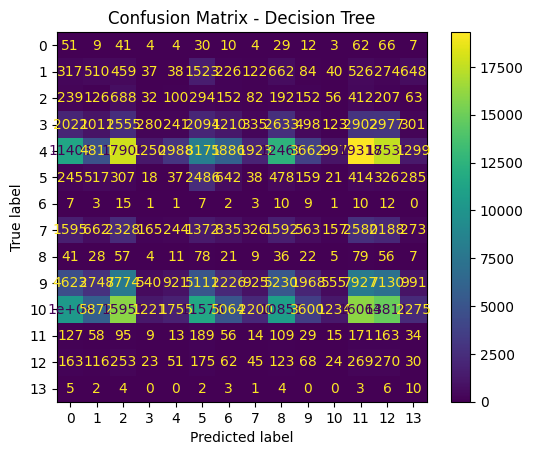

In [8]:
# Evaluate Decision Tree model
dt_metrics = evaluate_model(y_test, y_pred_dt)
for metric, value in dt_metrics.items():
    print(f"Decision Tree {metric}: {value}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [13]:
# # Handle imbalanced data using SMOTE
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# # Define the Decision Tree Classifier with hyperparameter optimization
# param_grid = {
#     'max_depth': [15],
#     'min_samples_split': [10],
#     'min_samples_leaf': [5],
#     'criterion': ['entropy'],
#     'random_state':[42]
# }

# grid_search = GridSearchCV(
#     estimator=DecisionTreeClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=3,  # 3-fold cross-validation
#     scoring='accuracy',
#     verbose=1
# )



In [5]:
# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Predict on the test set using the best estimator from GridSearchCV
y_pred_dt = grid_search.best_estimator_.predict(X_test)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [6]:
# Evaluation function
def evaluate_model(y_true, y_pred, average='weighted'):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average=average, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }
    return metrics



Decision Tree Accuracy: 0.03600324399573427
Decision Tree Precision: 0.31544716417746005
Decision Tree Recall: 0.03600324399573427
Decision Tree F1 Score: 0.0439403182656415
Decision Tree Confusion Matrix: [[   17    14    36     1     8    44     9     9     3     1    10     5
     71   104]
 [  446   954   315    55    66  1244   147   176    43     1    57   211
    257  1494]
 [  111   171   864     7   174   262   101   101    22     0    15    38
    661   268]
 [ 1455  1252  2722   274   366  1516   932   272    94     5   255   291
   2366  7382]
 [ 6966  5560 17965   809  4672  5968  5205  1805   989    65  1303  1525
  23723 33069]
 [   87  1322   300    18    45  2111   568    36     4     1    21    53
    391  1016]
 [    2     6    24     0     2     6     0     2     1     0     1     3
     13    21]
 [  848   970  2532   133   486  1070   702   355    75     4   214   265
   2608  4618]
 [   35    58    64     3    24    57    20    11     6     0     4    18
     61 

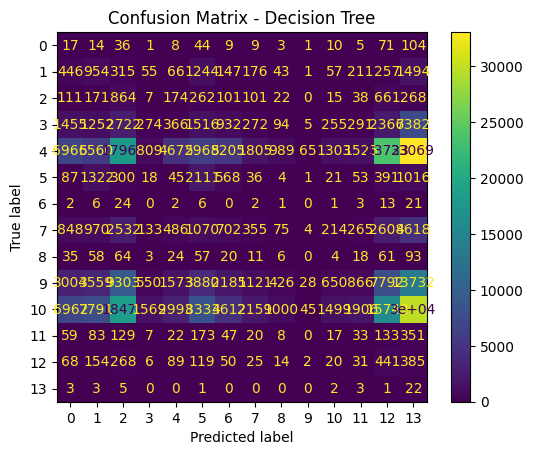

In [11]:
# Evaluate Decision Tree model
dt_metrics = evaluate_model(y_test, y_pred_dt)
for metric, value in dt_metrics.items():
    print(f"Decision Tree {metric}: {value}")

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# #!pip install imbalanced-learn
# import pandas as pd
# import zipfile
# import requests
# from io import BytesIO
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.exceptions import UndefinedMetricWarning
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV
# import warnings
# import matplotlib.pyplot as plt


# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)




We load the training and testing datasets directly from the GitHub repository. Each dataset is stored in a compressed `.zip` format and is extracted programmatically.

In [ ]:
# Base URL for your GitHub repository
base_url = "https://github.com/orifelszer/CrimeData/raw/main/"

# File names
files = {
    "X_train": "X_train_supervised.zip",
    "X_test": "X_test_supervised.zip",
    "y_train": "y_train_supervised.zip",
    "y_test": "y_test_supervised.zip"
}



In [ ]:
# Function to read zip files from the repository
def load_data_from_repo(file_name):
    url = base_url + file_name
    response = requests.get(url)
    if response.status_code == 200:
        with zipfile.ZipFile(BytesIO(response.content)) as z:
            # Assuming there's only one file in each zip
            extracted_file_name = z.namelist()[0]
            with z.open(extracted_file_name) as f:
                return pd.read_csv(f)
    else:
        raise Exception(f"Failed to download {file_name}")



In [ ]:
# Load datasets
X_train = load_data_from_repo(files["X_train"])
X_test = load_data_from_repo(files["X_test"])
y_train = load_data_from_repo(files["y_train"]).values.ravel()
y_test = load_data_from_repo(files["y_test"]).values.ravel()




The target labels in the dataset are imbalanced, meaning some crime categories are significantly underrepresented. To address this issue, we use the **Synthetic Minority Oversampling Technique (SMOTE)**, which generates synthetic examples for minority classes to balance the dataset.


In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



We implement a Decision Tree Classifier with the following parameters:
- `class_weight='balanced'`: Adjusts weights inversely proportional to class frequencies to handle imbalance.
- `random_state=42`: Ensures reproducibility of results.

Additionally, we prepare a basic model and provide a commented-out grid search implementation to explore hyperparameter optimization.

In [ ]:
# Define the Decision Tree Classifier with class weights
base_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [10],
    'min_samples_split': [20],
    'min_samples_leaf': [5],
    'criterion': ['entropy']}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Cross-Validation Score: 0.41543391660674134



The model performed better during cross-validation with an average accuracy 41.54% of , likely because it saw more balanced or familiar patterns from the training data.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set using the best estimator from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and print classification report
classification_report_output = classification_report(y_test, y_pred, zero_division=0)
print("\nClassification Report:\n", classification_report_output)


Accuracy: 38.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.40      0.03      0.06      5450
           2       0.00      0.00      0.00      2811
           3       0.06      0.00      0.00     19257
           4       0.41      0.72      0.52    109467
           5       0.13      0.30      0.18      5902
           6       0.00      0.00      0.00        78
           7       0.44      0.00      0.01     14778
           8       0.00      0.00      0.00       472
           9       0.26      0.00      0.00     48611
          10       0.38      0.38      0.38    102835
          11       0.00      0.00      0.00      1045
          12       0.00      0.00      0.00      1669
          13       0.00      0.00      0.00        44

    accuracy                           0.38    312752
   macro avg       0.15      0.10      0.08    312752
weighted avg       0.34      0.38     

This means the model correctly predicted 38.38% of samples in the test set.
The model performed worse on the test set, which indicates it struggles to generalize to unseen data.
The gap between cross-validation accuracy and test accuracy reflects the model's ability to generalize. A smaller gap indicates better generalization, while a larger gap suggests overfitting or challenges in adapting to new data.

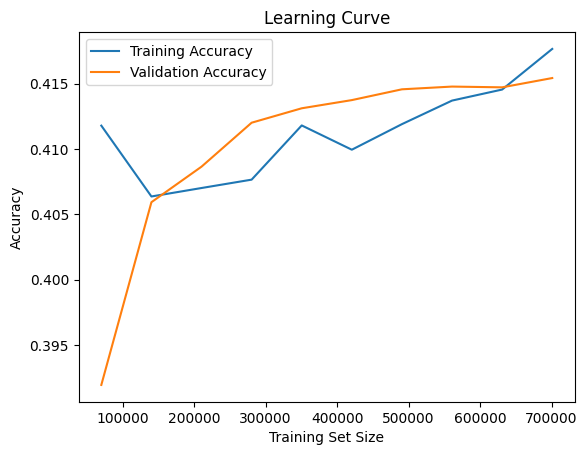

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X_train, y_train, cv=3, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


The learning curve plots training accuracy and validation accuracy as the training set size increases.
Helps diagnose overfitting or underfitting.


Both training and validation accuracy are converging at 41%.
The model does not improve significantly with more data, indicating it may have reached its capacity or is limited by the features (underfitting), being uncapable to fully capture patterns in the data.
